In [1]:
# Loading necessary libraries


import opensoundscape
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import librosa
import torch
import random
import sys
from PIL import Image
from scipy.ndimage import median_filter
from sklearn.preprocessing import StandardScaler
from PIL import Image as im 
from pathlib import Path
import cv2


c:\Users\joon4\AppData\Local\Programs\Python\Python311\Lib\site-packages\opensoundscape\ml\cnn.py:18: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [6]:
# Load Datasets

annotations = pd.read_csv("C:/Users/User/OneDrive/Desktop/Feature_Filtration/raw_sonobuoy_images/modified_annotations.csv")

unique_annotation = annotations.drop_duplicates(subset=['spectrogram_path'])

annotations_modded = annotations.copy()

annotations_modded["spectrogram_path"] = annotations["spectrogram_path"].str.replace('LotsOfStuff', 'processed_sonobuoy_images', regex=False)

annotations_modded.to_csv("C:/Users/User/OneDrive/Desktop/Feature_Filtration/processed_sonobuoy_images/modified_annotations.csv", index=False)



In [7]:
# Defining draw image functions

def draw_img(ax, img_vector, h=141, w=601):
    """
    1. takes img_vector,
    2. reshapes into right dimensions,
    3. draws the resulting image
    """
    
    
    ax.imshow( (img_vector).reshape(h,w), cmap=plt.cm.gray)
    
    plt.xticks(())
    plt.yticks(())

def draw_img_single(img_vector, h=141, w=601):
    """
    1. takes img_vector,
    2. reshapes into right dimensions,
    3. draws the resulting image
    """
    
    
    plt.imshow( (img_vector).reshape(h,w), cmap=plt.cm.gray)
    
    plt.xticks(())
    plt.yticks(())

In [8]:
# Here we construct the matrix of image data (rows are spectrograms and columns are pixel values for each spectrogram)



data_matrix = []

for index, row in unique_annotation.iterrows():

    image = Image.open(row['spectrogram_path'])

    pixel_values = np.array(list(image.getdata()))

    data_matrix.append(pixel_values)

stacked_specs = np.vstack(data_matrix)


scaler = StandardScaler(with_std=False)
data_matrix_mod1 = scaler.fit_transform(stacked_specs)
original_data = data_matrix_mod1

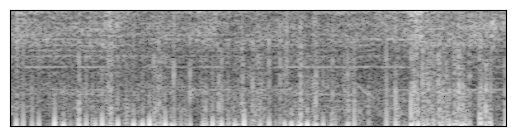

In [9]:
# Drawing some spectrograms


draw_img_single(original_data[0])



In [10]:

# Singular Value Decomposition

U, S, T = np.linalg.svd(original_data, full_matrices=False)

US = U*S

svd_data = US @ T

svd_data_scaled = scaler.inverse_transform(svd_data)

In [ ]:
signal_enhanced_features = np.zeros_like(T)

for i in range(len(T)):

    feature = np.copy(T[i].reshape((141, 601)))

    feature = median_filter(feature, size = 3)

    for j in range(feature.shape[1]):
        column = feature[:, j]
        percentile_value = np.percentile(column, 10)
        feature[:, j] = column - percentile_value
        feature[:, j][feature[:, j] < 0] = 0

    signal_enhanced_features[i] = feature.flatten()